# Logistic Regression

`Logistic regression` is a `classification` algorithm used to assign observations to a discrete set of classes.
Unlike linear regression which outputs continues number values, logistic regression transforms its output using the `logistic sigmoid function` to return a probability value which can then be mapped to two or more discrete classes.

Logistic regression can be used for:

- `binary` classification
- `multiclass` classification
- One-vs-rest classification

Logistic regression assumptions

- Dependent varible must be categorical in nature
- No outliers
- No high correlations among the independant variables

In [18]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


In [19]:
# Load titnaic data from sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
# Preporcess the data
# remove the deck column
titanic.drop('deck', axis=1, inplace=True)
# impute missing values in age and fare
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)
# impute missing values in embarked
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
# impute missing values in embark_town
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True)

# encode categorical variables using for loop where object and category data
for column in titanic.columns:
    if titanic[column].dtype == 'object' or titanic[column].dtype == 'category':
        le = LabelEncoder()
        titanic[column] = le.fit_transform(titanic[column])



# check for missing values
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [21]:
# X and y columns
X = titanic.drop('survived', axis=1)
y = titanic['survived']

In [22]:
# Train and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [23]:
# Model call
model = LogisticRegression()

In [24]:
# train the model
model.fit(X_train, y_train)

c:\Users\Shafiq\miniconda3\envs\python_ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
# Predict the values
y_pred = model.predict(X_test)


In [ ]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [26]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Confusion Matix: ', confusion_matrix(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))


Accuracy score:  1.0
Recall score:  1.0
Precision score:  1.0
F1 score:  1.0
Confusion Matix:  [[118   0]
 [  0  61]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        61

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

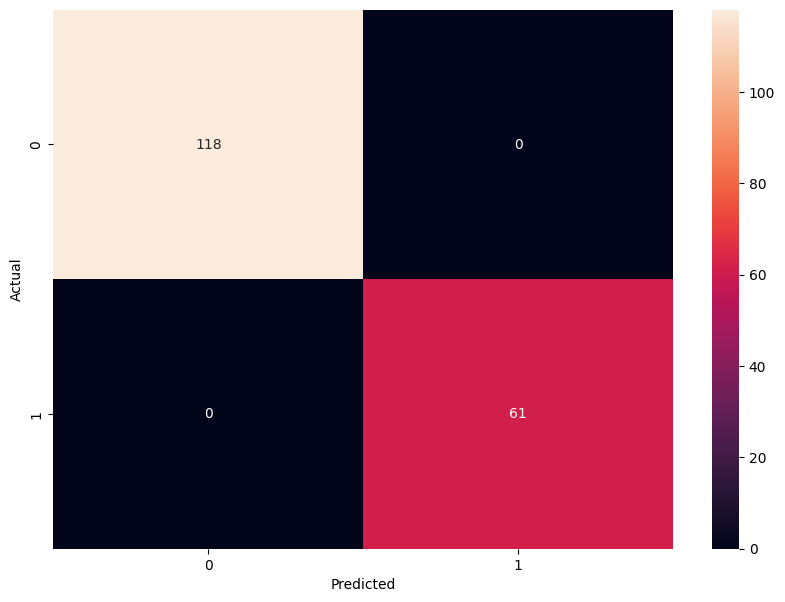

In [29]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [30]:
# Save the model
import pickle
pickle.dump(model, open('./saved_models/model.pkl', 'wb'))
